# Cleaning  and Formating Lyons Data

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_514-Machine-Learning/Data/lyon_housing.csv')
df.head()

,date_transaction,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,prix,adresse,commune,latitude,longitude,date_construction,anciennete
0,2019-10-31,ancien,maison,5,100.0,NaN,247.0,0,530000.0,6 PAS DES ANTONINS,Villeurbanne,45.781673,4.879333,2003-06-11 11:38:24,16.387783
1,2018-11-26,ancien,maison,2,52.0,NaN,156.0,0,328550.0,12 RUE DU LUIZET,Villeurbanne,45.783240,4.884683,2003-06-11 11:38:24,15.459633
2,2016-08-04,ancien,appartement,1,28.0,28.2,0.0,1,42500.0,4 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.148839
3,2016-11-18,ancien,appartement,3,67.0,66.3,0.0,1,180900.0,6 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.439058
4,2016-12-16,ancien,appartement,1,28.0,NaN,0.0,1,97000.0,163 AV ROGER SALENGRO,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.515719


In [2]:
import numpy as np
y = np.ravel(df[['prix']].to_numpy())
df.drop(columns=['prix'], inplace=True)  # Dropping columns

In [3]:
# Adding a column of the year the transaction and construction occurs
df['date_transaction'] = pd.to_datetime(df['date_transaction'])
df['transaction_year'] = df['date_transaction'].dt.year

df['date_construction'] = pd.to_datetime(df['date_construction'])
df['construction_year'] = df['date_construction'].dt.year


df.drop(columns=['date_transaction', 'date_construction', 'adresse'], inplace=True)  # Dropping columns

In [4]:
temp=pd.cut(df.anciennete,bins=[-5,0,5,10,20,30,40],labels=['UnderConstruction','0-5','5-10','10-20','20-30','30+'])
df['age']=temp
df.head(3)


,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,commune,latitude,longitude,anciennete,transaction_year,construction_year,age
0,ancien,maison,5,100.0,NaN,247.0,0,Villeurbanne,45.781673,4.879333,16.387783,2019,2003,10-20
1,ancien,maison,2,52.0,NaN,156.0,0,Villeurbanne,45.783240,4.884683,15.459633,2018,2003,10-20
2,ancien,appartement,1,28.0,28.2,0.0,1,Villeurbanne,45.781488,4.883474,13.148839,2016,2003,10-20


In [5]:
df.drop(columns=['anciennete'], inplace=True)  # Dropping columns
standardize_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
standardize_columns

['nombre_pieces',
 'surface_logement',
 'surface_carrez_logement',
 'surface_terrain',
 'nombre_parkings',
 'latitude',
 'longitude',
 'transaction_year',
 'construction_year']

In [6]:
string_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
df[string_columns].describe()

,type_achat,type_bien,commune,age
count,40516,40516,40516,40516
unique,2,2,10,6
top,ancien,appartement,Villeurbanne,20-30
freq,35562,39832,10330,19555


In [7]:
for feature in string_columns:
    prefix_Name = feature+'$'
    df1 = pd.get_dummies(pd.Series(df[feature]), dtype=float) #drop_first=True
    df = df.drop(feature, axis=1) #Removing the original feature from the list
    df = pd.concat([df,df1], axis = 1)
df.head()

,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,latitude,longitude,transaction_year,construction_year,VEFA,ancien,appartement,maison,Lyon 1er Arrondissement,Lyon 2e Arrondissement,Lyon 3e Arrondissement,Lyon 4e Arrondissement,Lyon 5e Arrondissement,Lyon 6e Arrondissement,Lyon 7e Arrondissement,Lyon 8e Arrondissement,Lyon 9e Arrondissement,Villeurbanne,UnderConstruction,0-5,5-10,10-20,20-30,30+
0,5,100.0,NaN,247.0,0,45.781673,4.879333,2019,2003,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,52.0,NaN,156.0,0,45.783240,4.884683,2018,2003,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,28.0,28.2,0.0,1,45.781488,4.883474,2016,2003,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,67.0,66.3,0.0,1,45.781488,4.883474,2016,2003,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,28.0,NaN,0.0,1,45.781488,4.883474,2016,2003,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# pipeline only the continuous data

df_continuous= num_pipeline.fit_transform(df[standardize_columns])
# put the resulting numpy matrix back into a dataframe
df_continuous=pd.DataFrame(df_continuous,columns=standardize_columns)
df_continuous.head()

,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,latitude,longitude,transaction_year,construction_year
0,1.870396,1.231567,-0.022121,6.673884,-0.996559,1.496520,0.909078,0.534877,0.63382
1,-0.671310,-0.469113,-0.022121,4.177029,-0.996559,1.600806,1.087988,-0.172704,0.63382
2,-1.518546,-1.319453,-1.658059,-0.103293,0.666260,1.484208,1.047558,-1.587867,0.63382
3,0.175925,0.062349,0.143364,-0.103293,0.666260,1.484208,1.047558,-1.587867,0.63382
4,-1.518546,-1.319453,-0.022121,-0.103293,0.666260,1.484208,1.047558,-1.587867,0.63382


In [9]:
df.drop(columns=standardize_columns, inplace=True)  # Dropping columns
x = pd.concat([df_continuous,df], axis=1)
x


,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,latitude,longitude,transaction_year,construction_year,VEFA,ancien,appartement,maison,Lyon 1er Arrondissement,Lyon 2e Arrondissement,Lyon 3e Arrondissement,Lyon 4e Arrondissement,Lyon 5e Arrondissement,Lyon 6e Arrondissement,Lyon 7e Arrondissement,Lyon 8e Arrondissement,Lyon 9e Arrondissement,Villeurbanne,UnderConstruction,0-5,5-10,10-20,20-30,30+
0,1.870396,1.231567,-0.022121,6.673884,-0.996559,1.496520,0.909078,0.534877,0.633820,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.671310,-0.469113,-0.022121,4.177029,-0.996559,1.600806,1.087988,-0.172704,0.633820,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.518546,-1.319453,-1.658059,-0.103293,0.666260,1.484208,1.047558,-1.587867,0.633820,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.175925,0.062349,0.143364,-0.103293,0.666260,1.484208,1.047558,-1.587867,0.633820,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.518546,-1.319453,-0.022121,-0.103293,0.666260,1.484208,1.047558,-1.587867,0.633820,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40511,-0.671310,-1.106868,-0.022121,-0.103293,0.666260,2.861893,-0.870423,1.242459,1.741278,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40512,-0.671310,-1.142299,-0.022121,-0.103293,-0.996559,2.861893,-0.870423,1.242459,1.741278,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40513,-0.671310,-1.496607,-0.022121,-0.103293,-0.996559,2.861893,-0.870423,1.242459,1.741278,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40514,-0.671310,-1.106868,-0.022121,-0.103293,-0.996559,2.861893,-0.870423,1.242459,1.741278,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
Final_features = x.columns

In [11]:
from sklearn.decomposition import PCA
PCA_build  = PCA(n_components=.75, svd_solver = 'full') # captures 50% of the variance
PCA_model = PCA_build.fit_transform(x)

cnt = 1
column_header = []
for column in range(PCA_model.shape[1]):
    column_name = 'Comp_{}'.format(cnt)
    column_header.append(column_name)
    cnt += 1

x = pd.DataFrame(PCA_model, columns= column_header)
x

,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6
0,2.217885,1.082608,2.392664,6.329212,0.262163,2.058026
1,-0.455179,1.230011,2.097873,4.008240,-0.378624,1.075990
2,-2.383338,1.797914,1.002731,-0.317559,-1.285438,0.131707
3,0.319311,1.750661,0.982740,-0.266558,-1.503661,-0.352870
4,-1.516333,1.775214,0.950335,-0.479285,-1.405610,-0.143509
...,...,...,...,...,...,...
40511,-0.656044,0.762891,3.012472,-1.356514,0.984474,1.272304
40512,-1.062105,0.292995,3.476181,-0.694697,0.612084,0.661884
40513,-1.266824,0.313793,3.468395,-0.727348,0.624755,0.689734
40514,-1.041633,0.290915,3.476959,-0.691432,0.610817,0.659099


In [12]:
Components_attributes = pd.DataFrame(PCA_build.components_, index = column_header, columns = Final_features)
Components_attributes

,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,latitude,longitude,transaction_year,construction_year,VEFA,ancien,appartement,maison,Lyon 1er Arrondissement,Lyon 2e Arrondissement,Lyon 3e Arrondissement,Lyon 4e Arrondissement,Lyon 5e Arrondissement,Lyon 6e Arrondissement,Lyon 7e Arrondissement,Lyon 8e Arrondissement,Lyon 9e Arrondissement,Villeurbanne,UnderConstruction,0-5,5-10,10-20,20-30,30+
Comp_1,0.560374,0.577799,0.529974,0.097990,0.231889,0.050360,-0.057692,0.023137,-0.007416,-0.010535,0.010535,-0.012469,0.012469,-0.005674,0.000334,-0.003440,0.008056,0.013679,0.009627,-0.015236,-0.006296,0.008478,-0.009528,-0.004418,0.001924,0.002435,-0.004942,0.000888,0.004113
Comp_2,0.034733,-0.058699,-0.013876,0.005140,0.283840,0.008133,0.546669,-0.070717,0.633911,0.085232,-0.085232,-0.001142,0.001142,-0.033436,-0.022992,-0.017033,-0.031971,-0.053422,-0.027337,-0.023947,0.008924,-0.048799,0.250014,0.071599,0.021669,0.017884,0.212924,-0.257977,-0.066099
Comp_3,0.004333,0.021973,-0.032028,0.072629,-0.279337,0.844708,-0.182439,0.170322,0.170326,-0.043909,0.043909,-0.008836,0.008836,0.031587,-0.004226,-0.070450,0.056704,0.004093,0.024266,-0.113420,-0.158871,0.100857,0.129461,-0.005713,0.007620,0.008350,0.110303,-0.137383,0.016823
Comp_4,0.060047,0.092154,-0.098858,0.813084,-0.399972,-0.129983,0.310742,0.033231,-0.105714,-0.049661,0.049661,-0.084256,0.084256,-0.000166,0.000478,0.041724,-0.015128,-0.034021,0.002497,-0.015059,0.030428,-0.057657,0.046905,-0.028336,-0.010802,-0.009679,0.035361,0.004023,0.009433
Comp_5,-0.021529,-0.035761,-0.073458,0.034395,0.224713,-0.133776,0.002307,0.928385,-0.025837,-0.049835,0.049835,-0.001880,0.001880,-0.006139,0.000803,0.004072,-0.008898,0.008451,-0.013564,0.012340,0.027896,-0.011523,-0.013437,-0.021530,-0.001626,0.003429,-0.000290,-0.153438,0.173456
Comp_6,-0.043026,-0.078604,-0.168231,0.477250,0.368774,-0.072388,-0.594626,-0.113743,0.362056,0.108537,-0.108537,-0.043329,0.043329,-0.011179,0.002737,-0.070220,0.012271,0.090308,-0.042014,0.074970,-0.012593,0.089358,-0.133638,0.094949,0.038394,0.028746,-0.097450,-0.039033,-0.025606


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.7,random_state=1)

# Random Forest
- class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)

In [14]:
from __future__ import print_function
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from tqdm import tqdm


param_grid = {
    'n_estimators': [100, 250, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

grid = ParameterGrid(param_grid)

best_mse = 999**999
best_params = {}

for params in tqdm(grid, total=len(grid), desc="Grid Search Progress"):
    model = RandomForestRegressor(**params, n_jobs = -1, random_state=25)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Parameters:", params)
    print("Mean Squared Error:", mse)
    print()

    if mse < best_mse:
        best_mse = mse
        best_params = params
        best_model = model

print("Best parameters:", best_params)
print("Best mse:", mse)


Grid Search Progress:   4%|▎         | 1/27 [00:38<16:39, 38.44s/it]

Parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 5956689707.390218



Grid Search Progress:   7%|▋         | 2/27 [01:26<18:27, 44.29s/it]

Parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Mean Squared Error: 5920609021.551062



Grid Search Progress:  11%|█         | 3/27 [03:06<27:47, 69.47s/it]

Parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Mean Squared Error: 5893950731.915279



Grid Search Progress:  15%|█▍        | 4/27 [03:23<18:40, 48.73s/it]

Parameters: {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error: 5932431966.599537



Grid Search Progress:  19%|█▊        | 5/27 [04:06<17:10, 46.86s/it]

Parameters: {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 250}
Mean Squared Error: 5870797800.245876



Grid Search Progress:  22%|██▏       | 6/27 [05:32<21:03, 60.15s/it]

Parameters: {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Squared Error: 5841364020.292886



Grid Search Progress:  26%|██▌       | 7/27 [05:48<15:14, 45.72s/it]

Parameters: {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 5928461291.132353



Grid Search Progress:  30%|██▉       | 8/27 [06:29<13:56, 44.01s/it]

Parameters: {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 250}
Mean Squared Error: 5877085843.74076



Grid Search Progress:  33%|███▎      | 9/27 [07:49<16:36, 55.36s/it]

Parameters: {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
Mean Squared Error: 5854998284.108038



Grid Search Progress:  37%|███▋      | 10/27 [08:05<12:16, 43.31s/it]

Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 5935333925.481068



Grid Search Progress:  41%|████      | 11/27 [08:47<11:24, 42.79s/it]

Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}
Mean Squared Error: 5860346933.023786



Grid Search Progress:  44%|████▍     | 12/27 [10:09<13:43, 54.89s/it]

Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Mean Squared Error: 5842921188.790923



Grid Search Progress:  48%|████▊     | 13/27 [10:26<10:06, 43.34s/it]

Parameters: {'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error: 5916053496.846044



Grid Search Progress:  52%|█████▏    | 14/27 [11:07<09:12, 42.46s/it]

Parameters: {'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 250}
Mean Squared Error: 5853721743.153911



Grid Search Progress:  56%|█████▌    | 15/27 [12:29<10:54, 54.53s/it]

Parameters: {'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Mean Squared Error: 5827262759.676653



Grid Search Progress:  59%|█████▉    | 16/27 [12:45<07:51, 42.83s/it]

Parameters: {'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 5896238166.7897415



Grid Search Progress:  63%|██████▎   | 17/27 [13:24<06:58, 41.87s/it]

Parameters: {'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 250}
Mean Squared Error: 5862655656.358826



Grid Search Progress:  67%|██████▋   | 18/27 [14:42<07:53, 52.65s/it]

Parameters: {'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
Mean Squared Error: 5844691196.636892



Grid Search Progress:  70%|███████   | 19/27 [14:57<05:31, 41.38s/it]

Parameters: {'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 5914529795.227248



Grid Search Progress:  74%|███████▍  | 20/27 [15:36<04:44, 40.58s/it]

Parameters: {'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 250}
Mean Squared Error: 5889712640.241629



Grid Search Progress:  78%|███████▊  | 21/27 [16:52<05:07, 51.17s/it]

Parameters: {'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Mean Squared Error: 5858782102.966008



Grid Search Progress:  81%|████████▏ | 22/27 [17:07<03:21, 40.40s/it]

Parameters: {'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error: 5914529795.227248



Grid Search Progress:  85%|████████▌ | 23/27 [17:45<02:38, 39.73s/it]

Parameters: {'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 250}
Mean Squared Error: 5889712640.241629



Grid Search Progress:  89%|████████▉ | 24/27 [19:01<02:31, 50.54s/it]

Parameters: {'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 500}
Mean Squared Error: 5858782102.966008



Grid Search Progress:  93%|█████████▎| 25/27 [19:16<01:19, 39.88s/it]

Parameters: {'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 5928039145.294499



Grid Search Progress:  96%|█████████▋| 26/27 [19:52<00:38, 38.83s/it]

Parameters: {'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 250}
Mean Squared Error: 5903855716.320843



Grid Search Progress: 100%|██████████| 27/27 [21:07<00:00, 46.96s/it]

Parameters: {'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Mean Squared Error: 5872722110.720166

Best parameters: {'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Best mse: 5872722110.720166


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 250, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

rf_Regressor = RandomForestRegressor(n_jobs = -1, random_state=25)

#Note: All scorer objects follow the convention that higher return values are better than lower return values.
#   Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error,
#   are available as neg_mean_squared_error which return the negated value of the metric.

grid_search = GridSearchCV(estimator=rf_Regressor, param_grid=param_grid, cv=2, n_jobs = -1, verbose = 5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Score: -6124324418.83305


In [16]:
#predictions based on the best hyperparameter
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 5893950731.915279


# Shap for the best model

In [17]:
!pip install shap

In [18]:
import shap
explainer = shap.PermutationExplainer(best_estimator.predict,X_train[:200])
shap_values = explainer.shap_values(X_test[:200])

PermutationExplainer explainer: 201it [04:50,  1.45s/it]


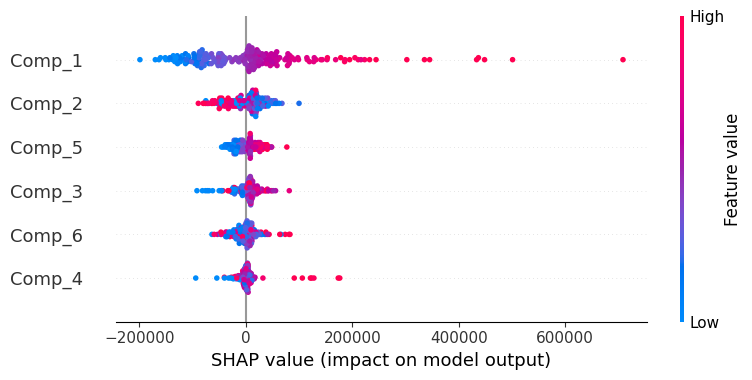

In [19]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,10))

shap.summary_plot(shap_values,X_test[:200],feature_names=X_test.columns)

### Interpreting the results on the Shap summary plot

---




When examining the Random Forest Shap Model, it's evident that component one emerges as the most crucial feature in the dataset, followed by components two and five. Analyzing the PCA model reveals that component one significantly influences weighted, nombre_pieces, surface_logement, and surface_carrez_logement, with a positive impact. Component two is predominantly associated with longitude and construction_year, showing a positive impact, while component five has a positive from on transaction_year. The Shap model indicates that higher values of component one correspond to higher prices, whereas lower values tend to align with lower prices compared to the mean. Similarly, for component two, higher values suggest lower prices, while lower values indicate higher prices than the mean. Component five indicates that higher values are associated with higher prices compared to the mean.


# XGboost

In [21]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 250, 500, 1000, 1500],
    'min_child_weight': [1, 5],
    'learning_rate': [.001, .0001, .00001]
    }

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=25)

#Note: All scorer objects follow the convention that higher return values are better than lower return values.
#   Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error,
#   are available as neg_mean_squared_error which return the negated value of the metric.

grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=2, n_jobs = -1, verbose = 5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Best Parameters: {'learning_rate': 0.001, 'min_child_weight': 5, 'n_estimators': 1500}
Best Score: -9106461915.43866


In [22]:
#predictions based on the best hyperparameter
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 8767867286.654726


In [23]:
explainer = shap.PermutationExplainer(best_estimator.predict,X_train[:200])
shap_values = explainer.shap_values(X_test[:200])

PermutationExplainer explainer: 201it [01:21,  2.19it/s]


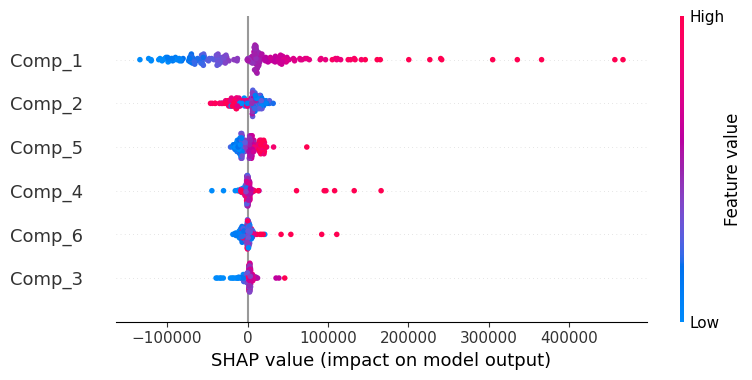

In [24]:
fig=plt.figure(figsize=(10,10))
shap.summary_plot(shap_values,X_test[:200],feature_names=X_test.columns)

### Interpreting the results on the Shap summary plot
The XGB Forest exhibits a similar pattern to the Random Forest, with component one, followed by components two and five, being the most significant features. Like the Random Forest, the Shap model for XGB highlights that higher values of component one generally correspond to higher prices, while lower values indicate lower prices compared to the mean. Similarly, for component two, higher values suggest lower prices, whereas lower values tend to signify higher prices compared to the mean. Component five suggests that higher values are typically associated with higher prices compared to the mean.

Overall, the PCA model reinforces the importance of component one in influencing weighted, nombre_pieces, surface_logement, and surface_carrez_logement positively. It also emphasizes the positive impact of component two on longitude and construction_year, while component five primarily affects transaction_year positively.